In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from pytrends.request import TrendReq

Setup pytrend and Define keyword

In [ ]:
pytrends = TrendReq(hl = 'en-US', tz = 360)
keyword = 'Cloud computing' 

Data Request

In [ ]:
pytrends.build_payload([keyword], cat=0, timeframe='today 12-m', geo='', gprop='')


Country Wise Intrest

In [ ]:
region_data = pytrends.interest_by_region()
region_data = region_data.sort_values(by = keyword, ascending = False).head(15)

draw graph for visualization

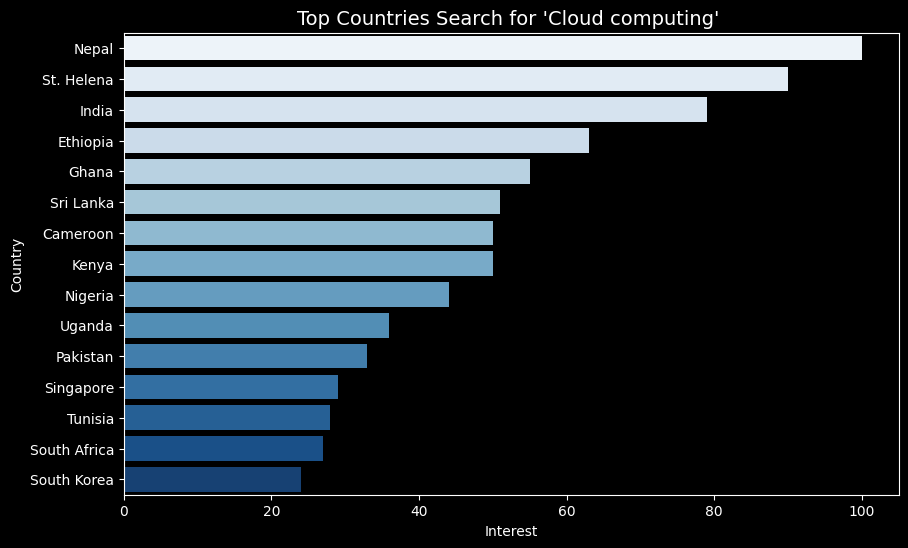

In [ ]:
plt.figure(figsize = (10,6))
plt.style.use("dark_background")
sns.barplot(x = region_data[keyword], y = region_data.index,
            hue = region_data.index,
            palette = "Blues")
plt.title(f"Top Countries Search for '{keyword}' ",color="white", fontsize=14)
plt.xlabel("Interest",color="white")
plt.ylabel("Country",color="white")
plt.show()

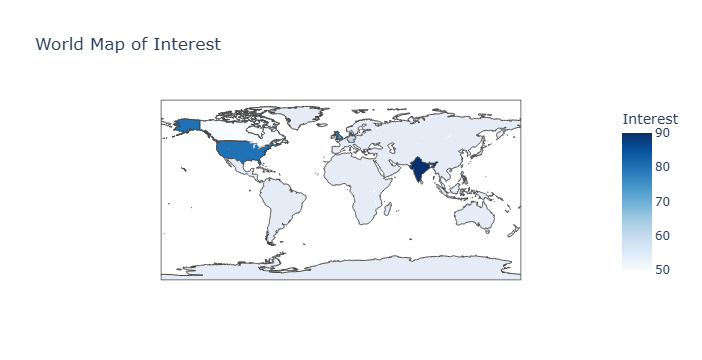

In [ ]:
import pandas as pd
import plotly.express as px
import pycountry


region_data = pd.DataFrame({
    "Country": ["India", "United States", "United Kingdom", "Germany", "Canada"],
    "Interest": [90, 80, 75, 60, 50]
})

# ✅ Convert Country Names -> ISO-3 Codes
def get_iso3(country_name):
    try:
        return pycountry.countries.lookup(country_name).alpha_3
    except:
        return None

region_data["ISO-3"] = region_data["Country"].apply(get_iso3)

fig = px.choropleth(
    region_data,
    locations="ISO-3",         
    color="Interest",
    hover_name="Country",
    title="World Map of Interest",
    color_continuous_scale="Blues"  
)

fig.show()


Time Wise Interest

In [ ]:
time_df = pytrends.interest_over_time()

C:\Users\rohit\AppData\Local\Programs\Python\Python313\Lib\site-packages\pytrends\request.py:260: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



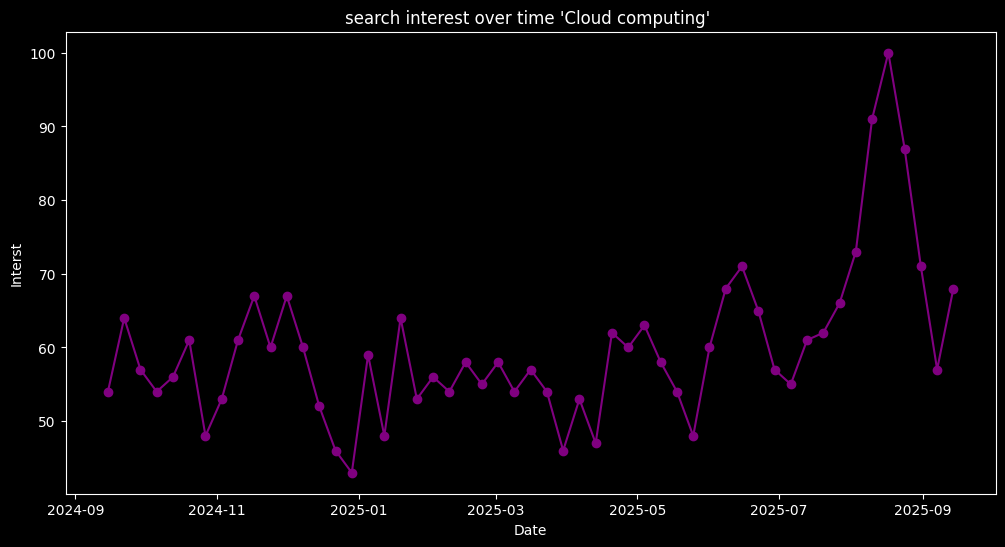

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(time_df.index, time_df[keyword],marker = 'o', color = 'purple')
plt.title(f"search interest over time '{keyword}' ")
plt.xlabel("Date")
plt.ylabel("Interst")
plt.show()


Multiple Keyword Compare

In [ ]:
key_word = ["Cloud Computing", "data science", "machine learning"]
pytrends.build_payload(key_word, cat=0, timeframe='today 12-m', geo='', gprop='')

C:\Users\rohit\AppData\Local\Programs\Python\Python313\Lib\site-packages\pytrends\request.py:260: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



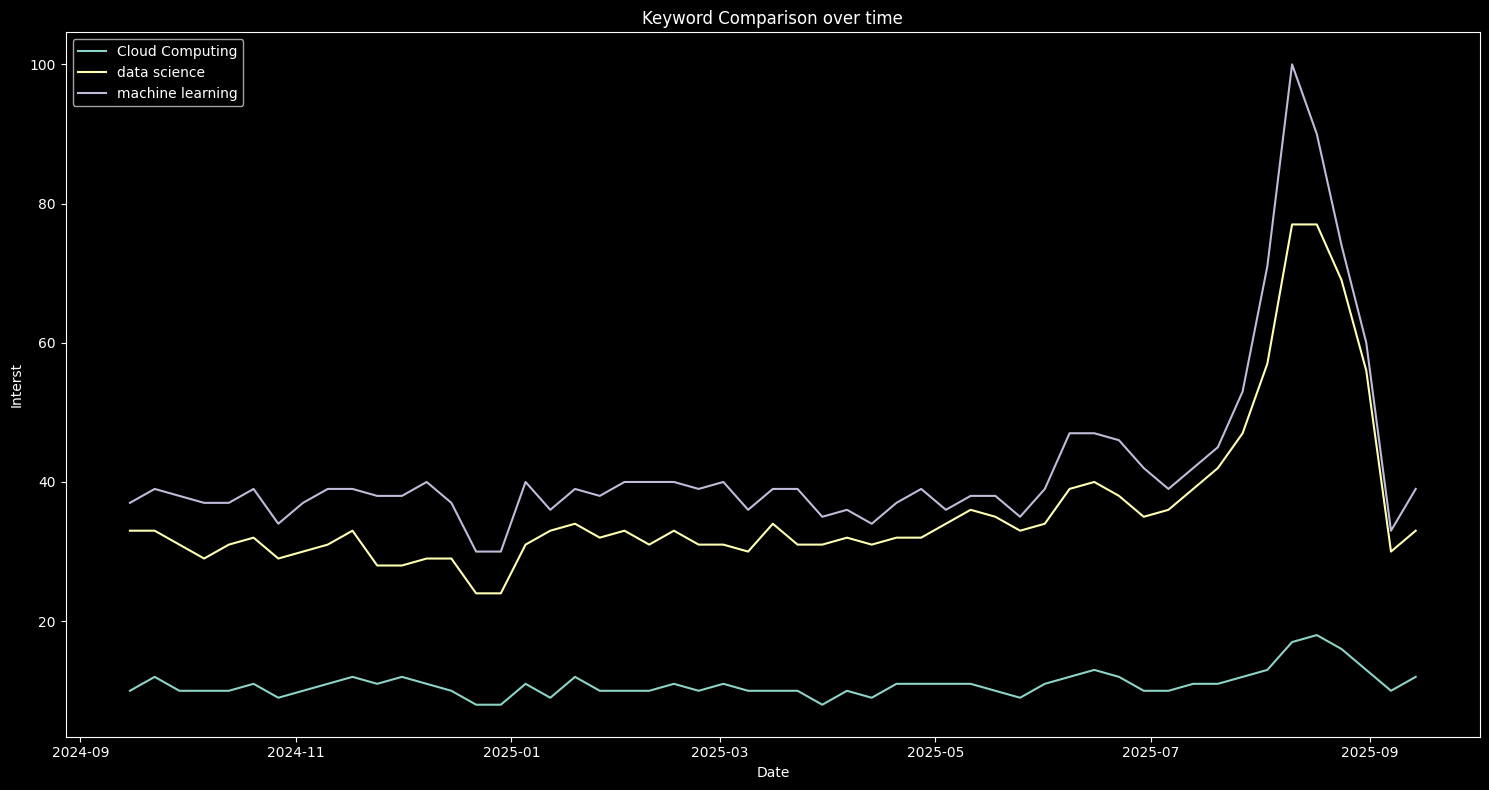

In [ ]:
compare_df = pytrends.interest_over_time()
plt.figure(figsize=(15,8))
for kw in key_word :
    plt.plot(compare_df.index, compare_df[kw],label = kw)

plt.title(f"Keyword Comparison over time")
plt.xlabel("Date")
plt.ylabel("Interst")
plt.legend()

plt.tight_layout()
plt.show()